In [248]:
%pylab inline

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
import numpy as np
mpl.rcParams['pdf.fonttype'] = 42
import scipy.stats
import sklearn.linear_model
import sklearn.ensemble

DATAPATH = "../data"

# Zscores file: chrom	start	end	ml_mu	ml_mu_se	pred_mu	predmu_se	zscore
zscores = pd.read_csv(os.path.join(DATAPATH, "autosomal_perlocus_zscores.bed"), sep="\t")
zscores["diff"] = zscores["ml_mu"]-zscores["pred_mu"]
zscores["length"] = zscores["end"]-zscores["start"]+1
#zscores = zscores[zscores["ml_mu_se"]!=0]

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [249]:
# Unscale standard errors, recalc zscores
"""
def GetZScore(x):
    num = x["ml_mu"]-x["pred_mu"]
    #denom = np.sqrt(x["ml_mu_se_recalc"]**2/2 + x["predmu_se"]**2/2)
    denom = x["predmu_se"]*100
    return num/denom

GAMMA = 1.2
zscores["ml_mu_se_recalc"] = zscores.apply(lambda x: x["ml_mu_se"]/GAMMA/abs(x["ml_mu"]), 1)
zscores["zscore"] = zscores.apply(GetZScore, 1)
"""

'\ndef GetZScore(x):\n    num = x["ml_mu"]-x["pred_mu"]\n    #denom = np.sqrt(x["ml_mu_se_recalc"]**2/2 + x["predmu_se"]**2/2)\n    denom = x["predmu_se"]*100\n    return num/denom\n\nGAMMA = 1.2\nzscores["ml_mu_se_recalc"] = zscores.apply(lambda x: x["ml_mu_se"]/GAMMA/abs(x["ml_mu"]), 1)\nzscores["zscore"] = zscores.apply(GetZScore, 1)\n'

In [258]:
# Get zscores by STR set
boxdata = []
diffdata = []
labels = []
for strset in ["lobSTR_ref_GRCh37_intergenic.bed", "lobSTR_ref_GRCh37_intron.bed", \
              "lobSTR_ref_GRCh37_5utr.bed", "lobSTR_ref_GRCh37_3utr.bed", \
              "lobSTR_ref_GRCh37_coding.bed", \
               "lobSTR_ref_GRCh37_missenseconstrained.bed", "lobSTR_ref_GRCh37_missenseconstrainedintron.bed", \
              "lobSTR_ref_GRCh37_pLI.bed", "lobSTR_ref_GRCh37_pLIintron.bed", "eSTRs.bed",
              "lobSTR_ref_GRCh37_IDgenes.bed"]:
    label = strset.split(".bed")[0].split("_")[-1]
    if len(label)>12: label = label[0:12]
    if label == "IDgenes":
        names = ["chrom","start","end","gene"]
    else: names = ["chrom","start","end"]
    setdata = pd.read_csv(os.path.join(DATAPATH, strset), sep="\t", names=names)
    setdata = pd.merge(setdata, zscores, on=["chrom","start"]).drop_duplicates()
    setdata = setdata[setdata["ml_mu_se"]>0]
    print label, setdata.shape[0], np.mean(setdata["diff"]), scipy.stats.ttest_rel(setdata["ml_mu"], setdata["pred_mu"])
    boxdata.append(list(setdata["zscore"]))
    diffdata.append(list(setdata["ml_mu"]-setdata["pred_mu"]))
    labels.append(label)

intergenic 129604 0.00390513678381 Ttest_relResult(statistic=1.3334419377835245, pvalue=0.18238916115670087)
intron 102159 0.0134137514115 Ttest_relResult(statistic=4.163371175345965, pvalue=3.1383971131171065e-05)
5utr 1230 -0.00443340231076 Ttest_relResult(statistic=-0.15411664692736282, pvalue=0.87754306561855144)
3utr 2216 0.0458358288508 Ttest_relResult(statistic=2.1377861849048183, pvalue=0.032643273014902788)
coding 699 -0.217571029194 Ttest_relResult(statistic=-5.5134525112824484, pvalue=4.9567847420199134e-08)
missensecons 138 -0.298280011524 Ttest_relResult(statistic=-3.4368913725462855, pvalue=0.00077946584024718327)
missensecons 9675 0.0178075287189 Ttest_relResult(statistic=1.7241249558524185, pvalue=0.084717234376601599)
pLI 217 -0.258312802524 Ttest_relResult(statistic=-3.7168445436576865, pvalue=0.00025700429676940063)
pLIintron 24551 0.01948896 Ttest_relResult(statistic=3.0393533752267237, pvalue=0.0023733603844099229)
eSTRs 1540 0.707472760315 Ttest_relResult(statisti

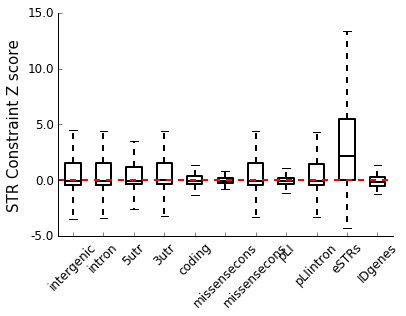

In [260]:
# Boxplot
fig = plt.figure()
ax = fig.add_subplot(111)
box = ax.boxplot(boxdata, sym="");
plt.setp(box['boxes'], color='black', linewidth=2)
plt.setp(box['whiskers'], color='black', linewidth=2)
plt.setp(box['medians'], color='black', linewidth=2)
plt.setp(box['caps'], color='black')
ax.axhline(y=0, linestyle="dashed", color="red",linewidth=2)
ax.set_ylabel("STR Constraint Z score", size=15)
ax.set_xticklabels(labels, size=12, rotation=45);
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

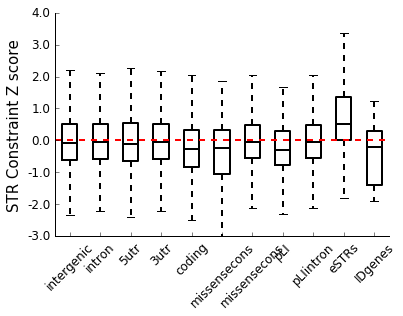

In [252]:
# Boxplot
fig = plt.figure()
ax = fig.add_subplot(111)
box = ax.boxplot(diffdata, sym="");
plt.setp(box['boxes'], color='black', linewidth=2)
plt.setp(box['whiskers'], color='black', linewidth=2)
plt.setp(box['medians'], color='black', linewidth=2)
plt.setp(box['caps'], color='black')
ax.axhline(y=0, linestyle="dashed", color="red",linewidth=2)
ax.set_ylabel("STR Constraint Z score", size=15)
ax.set_xticklabels(labels, size=12, rotation=45);
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

(-inf, -2) 15
(-2, 0) 375
(0, 2) 218
(2, inf) 12


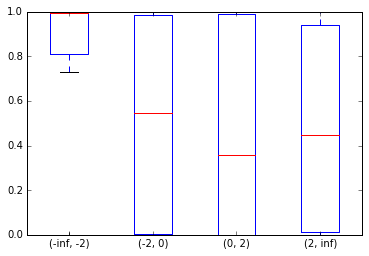

In [253]:
# Check out pLI scores
pLI = pd.read_csv(os.path.join(DATAPATH, "lobSTR_pLI_scores_coding.bed"), sep="\t", names=["chrom","start","end","pLI"])
pLI = pd.merge(pLI, zscores, on=["chrom","start","end"]).drop_duplicates()
scores = []
bins = [(-1*np.inf, -2), (-2, 0), (0, 2), (2, np.inf)]
for b in bins:
    d = pLI[(pLI["diff"]>=b[0]) & (pLI["diff"]<b[1]) & (pLI["ml_mu_se"]>0)]
    print b, d.shape[0]
    scores.append(list(d["pLI"]))
  
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(scores);
ax.set_xticklabels(bins);

(-inf, -2) 15
(-2, 0) 375
(0, 2) 218
(2, inf) 12


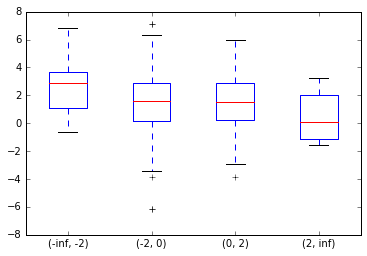

In [254]:
# Check out missense constraint scores
ms = pd.read_csv(os.path.join(DATAPATH, "lobSTR_missense_scores_coding.bed"), sep="\t", names=["chrom","start","end","ms"])
ms = pd.merge(ms, zscores, on=["chrom","start","end"]).drop_duplicates()
scores = []
bins = [(-1*np.inf, -2), (-2, 0), (0, 2), (2, np.inf)]
for b in bins:
    d = ms[(ms["diff"]>=b[0]) & (ms["diff"]<b[1])& (ms["ml_mu_se"]>0)]
    print b, d.shape[0]
    scores.append(list(d["ms"]))
  
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(scores);
ax.set_xticklabels(bins);

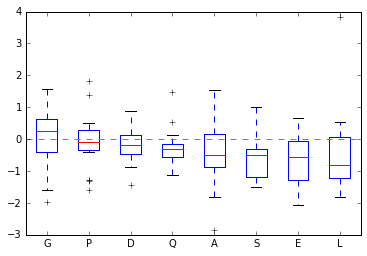

In [255]:
# Check out amino acids
aas = pd.read_csv(os.path.join(DATAPATH, "lobSTR_ref_GRCh37_coding_aas.bed"), sep="\t", \
                  names=["chrom","start","end","strand","seq","aas"])
aas = pd.merge(aas, zscores, on=["chrom","start","end"])
aas = aas[aas["ml_mu_se"]>0]

aadata = []
labels = []
allAAs = set([item for item in aas.aas if "," not in item])
allAAs = list(aas[aas["aas"].apply(lambda x: x in allAAs)].groupby("aas", as_index=False).agg({"diff": np.median}).sort("diff", ascending=False)["aas"])
allAAs.append("R,E")
#for aa in set(aas_pure.aas):
for aa in allAAs:
    x = aas[(aas["aas"].apply(lambda x: aa == x))]
    if x.shape[0] >= 10:
        aadata.append(list(x["diff"]))
        labels.append(aa)
    
# Plot diff by AA
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(aadata)
ax.set_xticklabels(labels);
ax.axhline(y=0, linestyle="dashed", color="gray")

In [263]:
# Check out ID/autism genes
strset = "lobSTR_ref_GRCh37_IDgenes.bed"
setdata = pd.read_csv(os.path.join(DATAPATH, strset), sep="\t", names=["chrom","start","end","gene"])
setdata = pd.merge(setdata, zscores, on=["chrom","start"]).drop_duplicates()
setdata = setdata[setdata["ml_mu_se"]>0]
setdata.sort("diff").head()

,chrom,start,end_x,gene,end_y,ml_mu,ml_mu_se,pred_mu,predmu_se,zscore,diff,length
76,2,50574009,50574039,NRXN1,50574039,-5.950256,1.447669,-4.031460,0.049544,-1.873357,-1.918796,31
201,11,65838045,65838090,PACS1,65838090,-7.674292,75.923067,-5.850908,0.021108,-0.033964,-1.823384,46
136,5,92920821,92920844,NR2F1-AS1,92920844,-7.674279,11.337342,-6.015228,0.029502,-0.206948,-1.659052,24
137,5,92920821,92920844,NR2F1,92920844,-7.674279,11.337342,-6.015228,0.029502,-0.206948,-1.659052,24
285,19,13319694,13319722,CACNA1A,13319722,-6.052147,2.078686,-4.437791,0.038382,-1.098124,-1.614356,29


In [256]:
pLI = pd.read_csv(os.path.join(DATAPATH, "lobSTR_pLI_scores_coding.bed"), sep="\t", names=["chrom","start","end","pLI"])
ms = pd.merge(ms, pLI, on=["chrom","start","end"]).drop_duplicates()
ms[ms["ml_mu_se"]>0].sort("diff").head()

,chrom,start,end,ms,ml_mu,ml_mu_se,pred_mu,predmu_se,zscore,diff,length,pLI
2730,14,99641544,99641583,6.355727,-7.674310,53.416452,-4.680340,0.040291,-0.079266,-2.993970,40,0.904163
3423,8,28209226,28209250,0.860436,-7.674304,6.967117,-4.823331,0.046803,-0.578689,-2.850972,25,0.728989
2506,11,115080312,115080345,2.269928,-6.457136,4.454291,-3.745557,0.040043,-0.860877,-2.711579,34,0.991493
2704,14,73572607,73572668,4.464311,-7.674291,216.880942,-5.176177,0.016064,-0.016289,-2.498114,62,1.000000
144,1,53793512,53793546,3.051198,-6.124505,1.620393,-3.734183,0.030215,-2.085813,-2.390322,35,0.999965
